# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [4]:
df.isna().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [5]:
# parece que existem valores nulos que não fazem muito sentido, ja que é possivel ter numeros decimais no campo, vamos excluir os 0.
df = df.dropna()

In [6]:
df.isna().sum()

Unnamed: 0               0
data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64

In [36]:
# Novo DF para as variáveis de interesse
df_2 = df[['mau','data_ref','posse_de_veiculo','posse_de_imovel','renda']]

In [40]:
# Novo DF para as variáveis de interesse
df_2 = df.loc[:, df.select_dtypes(include=['object', 'boolean']).columns].join(df['renda'])

In [41]:
df_2

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau,renda
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False,3369.24
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False,6096.14
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False,5658.98
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False,7246.69
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False,4017.37
...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,Assalariado,Secundário,Casado,Casa,False,1193.29
14996,2016-03-01,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False,2519.18
14997,2016-03-01,F,True,True,Assalariado,Secundário,Casado,Casa,False,1586.85
14998,2016-03-01,F,False,True,Servidor público,Superior completo,Casado,Casa,False,6975.39


In [43]:
df_2['data_ref'] = pd.to_datetime(arg=df_2['data_ref'])

In [44]:
# criar coluna com mes
df_2.loc[:,'data_ref_mes'] = df_2['data_ref'].dt.month

In [45]:
tab = pd.crosstab(df_2['data_ref_mes'],df_2['mau'])
tab.div(tab.sum(axis = 1), axis = 0)

mau,False,True
data_ref_mes,,
1,0.982143,0.017857
2,0.970553,0.029447
3,0.971789,0.028211
4,0.971985,0.028015
5,0.977594,0.022406
6,0.976687,0.023313
7,0.975400,0.024600
8,0.981481,0.018519
9,0.978339,0.021661


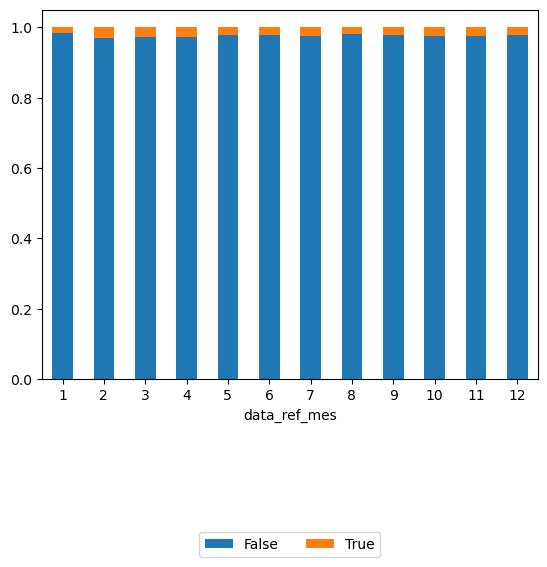

In [13]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['mau'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = df_2['data_ref_mes'].unique()

ticks = ax.set_xticks(list(range(df_2['data_ref_mes'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

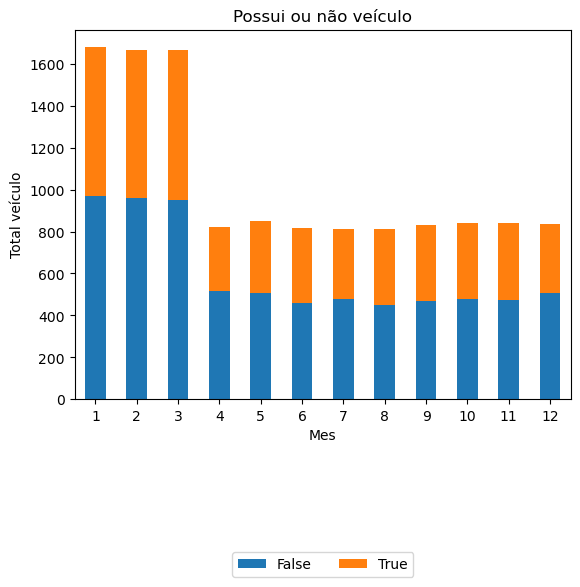

In [14]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['posse_de_veiculo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab_freq.plot.bar(stacked = True)

plt.title("Possui ou não veículo")
plt.xlabel("Mes")
plt.ylabel("Total veículo")

tick_labs = df_2['data_ref_mes'].unique()

ticks = ax.set_xticks(list(range(df_2['data_ref_mes'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [15]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['posse_de_veiculo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

posse_de_veiculo,False,True
data_ref_mes,,
1,0.576786,0.423214
2,0.576322,0.423678
3,0.569628,0.430372
4,0.627284,0.372716
5,0.599057,0.400943
6,0.564417,0.435583
7,0.589176,0.410824
8,0.555556,0.444444
9,0.565584,0.434416


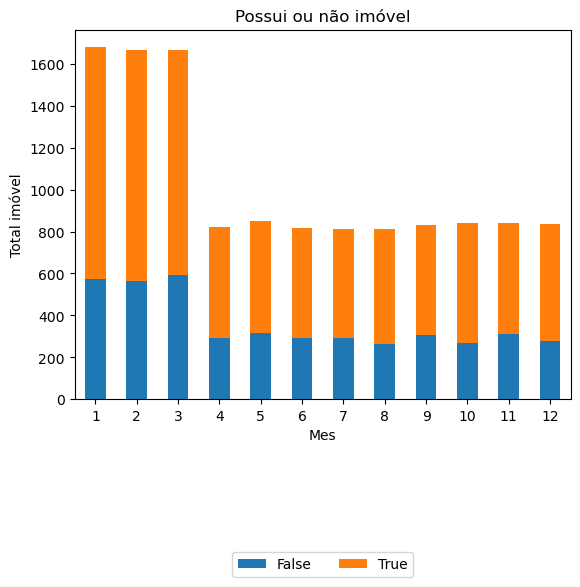

In [16]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab_freq.plot.bar(stacked = True)

plt.title("Possui ou não imóvel")
plt.xlabel("Mes")
plt.ylabel("Total imóvel")

tick_labs = df_2['data_ref_mes'].unique()

ticks = ax.set_xticks(list(range(df_2['data_ref_mes'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [17]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

posse_de_imovel,False,True
data_ref_mes,,
1,0.340476,0.659524
2,0.337740,0.662260
3,0.355942,0.644058
4,0.353228,0.646772
5,0.370283,0.629717
6,0.355828,0.644172
7,0.359164,0.640836
8,0.323457,0.676543
9,0.369434,0.630566


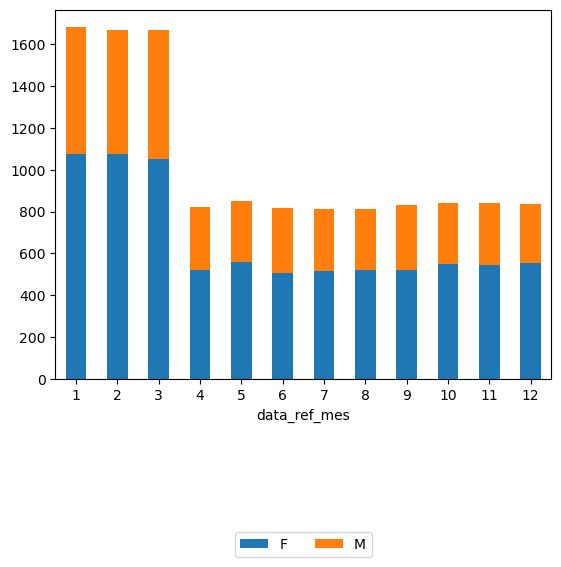

In [18]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['sexo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab_freq.plot.bar(stacked = True)

tick_labs = df_2['data_ref_mes'].unique()

ticks = ax.set_xticks(list(range(df_2['data_ref_mes'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [19]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['sexo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

sexo,F,M
data_ref_mes,,
1,0.640476,0.359524
2,0.646034,0.353966
3,0.630252,0.369748
4,0.634592,0.365408
5,0.659198,0.340802
6,0.620859,0.379141
7,0.633456,0.366544
8,0.640741,0.359259
9,0.629362,0.370638


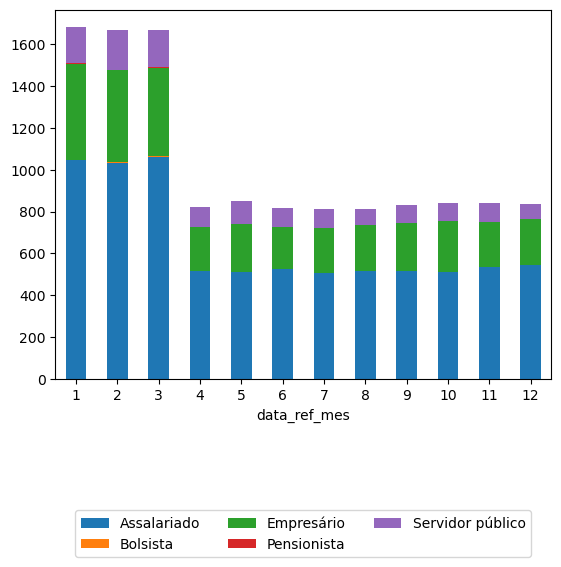

In [20]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['tipo_renda'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = df_2['data_ref_mes'].unique()

ticks = ax.set_xticks(list(range(df_2['data_ref_mes'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [21]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['tipo_renda'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

tipo_renda,Assalariado,Bolsista,Empresário,Pensionista,Servidor público
data_ref_mes,,,,,
1,0.623214,0.000000,0.272619,0.001786,0.102381
2,0.620192,0.001202,0.265625,0.000601,0.112380
3,0.637455,0.000600,0.253902,0.001200,0.106843
4,0.629720,0.000000,0.255786,0.001218,0.113276
5,0.600236,0.000000,0.274764,0.000000,0.125000
6,0.646626,0.000000,0.246626,0.000000,0.106748
7,0.621156,0.000000,0.266913,0.000000,0.111931
8,0.637037,0.000000,0.274074,0.000000,0.088889
9,0.623345,0.000000,0.275572,0.000000,0.101083


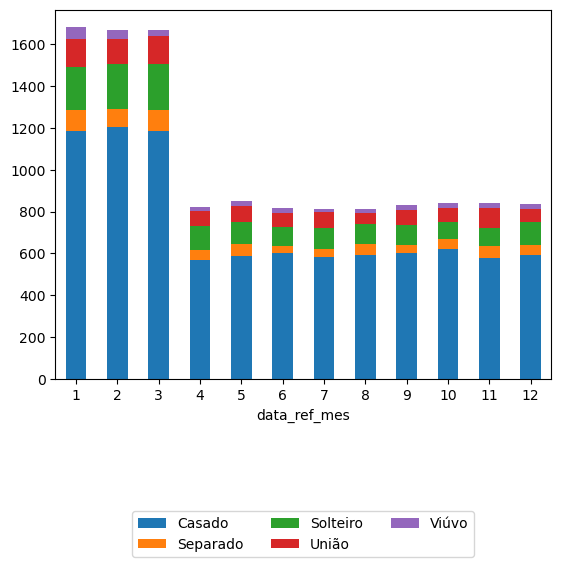

In [22]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['estado_civil'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = df_2['data_ref_mes'].unique()

ticks = ax.set_xticks(list(range(df_2['data_ref_mes'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [23]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['estado_civil'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

estado_civil,Casado,Separado,Solteiro,União,Viúvo
data_ref_mes,,,,,
1,0.703571,0.060714,0.123810,0.079167,0.032738
2,0.723558,0.051082,0.128005,0.072716,0.024639
3,0.711885,0.059424,0.132053,0.078631,0.018007
4,0.691839,0.056029,0.140073,0.088916,0.023143
5,0.695755,0.067217,0.119104,0.089623,0.028302
6,0.737423,0.042945,0.109202,0.082209,0.028221
7,0.717097,0.046740,0.123001,0.092251,0.020910
8,0.733333,0.060494,0.118519,0.069136,0.018519
9,0.722022,0.049338,0.115523,0.084236,0.028881


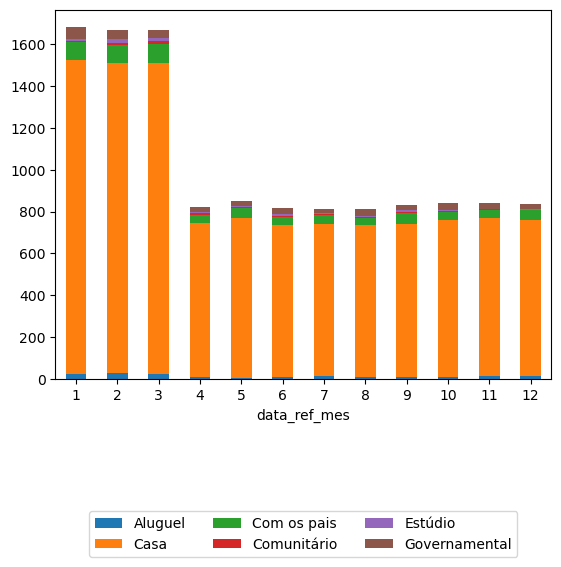

In [24]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['tipo_residencia'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)

ax = tab.plot.bar(stacked = True)

tick_labs = df_2['data_ref_mes'].unique()

ticks = ax.set_xticks(list(range(df_2['data_ref_mes'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=0)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [25]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['tipo_residencia'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

tipo_residencia,Aluguel,Casa,Com os pais,Comunitário,Estúdio,Governamental
data_ref_mes,,,,,,
1,0.015476,0.892262,0.051190,0.002381,0.004762,0.033929
2,0.016226,0.890024,0.052885,0.005409,0.011418,0.024038
3,0.014406,0.892557,0.054022,0.006603,0.010204,0.022209
4,0.010962,0.897686,0.047503,0.010962,0.004872,0.028015
5,0.008255,0.897406,0.056604,0.004717,0.004717,0.028302
6,0.013497,0.889571,0.046626,0.006135,0.012270,0.031902
7,0.015990,0.895449,0.051661,0.007380,0.002460,0.027060
8,0.012346,0.898765,0.039506,0.002469,0.008642,0.038272
9,0.010830,0.882070,0.063779,0.004813,0.010830,0.027677


**Após Abril houve uma queda significativa de emprestimos, isso pode ter diversas causas, como dividas de comeco de ano, ferias e festas de fim de ano, necessitando emprestimos apra pagar, mas a proporção não mudou significativamente, ou seja, podemos utilizar o modelo, se for criado.** 

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

In [26]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['posse_de_imovel'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

posse_de_imovel,False,True
data_ref_mes,,
1,572.0,1108.0
2,562.0,1102.0
3,593.0,1073.0
4,290.0,531.0
5,314.0,534.0
6,290.0,525.0
7,292.0,521.0
8,262.0,548.0
9,307.0,524.0


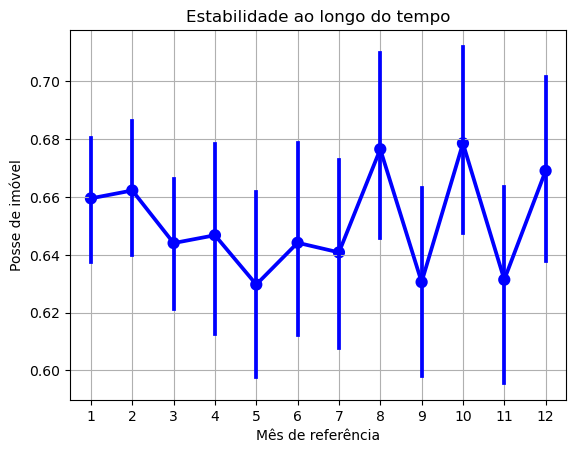

In [47]:
ax = sns.pointplot(x="data_ref_mes", y="posse_de_imovel", label="Estabilidade",
                  data=df_2, dodge=True, ci=95, color="blue", markers="o",
                  linestyle="--", errbars="sd") 

plt.title("Estabilidade ao longo do tempo")  
plt.xlabel("Mês de referência")  
plt.ylabel("Posse de imóvel")  
plt.grid(True)  


plt.show()

In [28]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['posse_de_veiculo'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

posse_de_veiculo,False,True
data_ref_mes,,
1,0.576786,0.423214
2,0.576322,0.423678
3,0.569628,0.430372
4,0.627284,0.372716
5,0.599057,0.400943
6,0.564417,0.435583
7,0.589176,0.410824
8,0.555556,0.444444
9,0.565584,0.434416


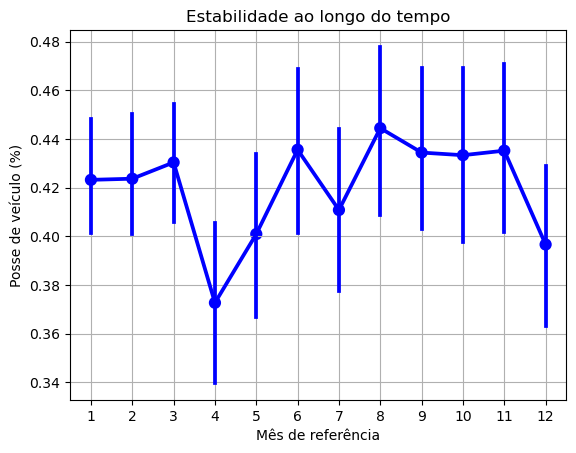

In [29]:
ax = sns.pointplot(x="data_ref_mes", y="posse_de_veiculo", label="Estabilidade",
                  data=df_2, dodge=True, ci=95, color="blue", markers="o",
                  linestyle="--", errbars="sd") 

plt.title("Estabilidade ao longo do tempo")  
plt.xlabel("Mês de referência")  
plt.ylabel("Posse de veículo (%)")  
plt.grid(True)  


plt.show()

In [30]:
tab_freq = pd.crosstab(df_2['data_ref_mes'],df_2['mau'])
tab = tab_freq.div(tab.sum(axis = 1), axis = 0)
tab

mau,False,True
data_ref_mes,,
1,1650.0,30.0
2,1615.0,49.0
3,1619.0,47.0
4,798.0,23.0
5,829.0,19.0
6,796.0,19.0
7,793.0,20.0
8,795.0,15.0
9,813.0,18.0


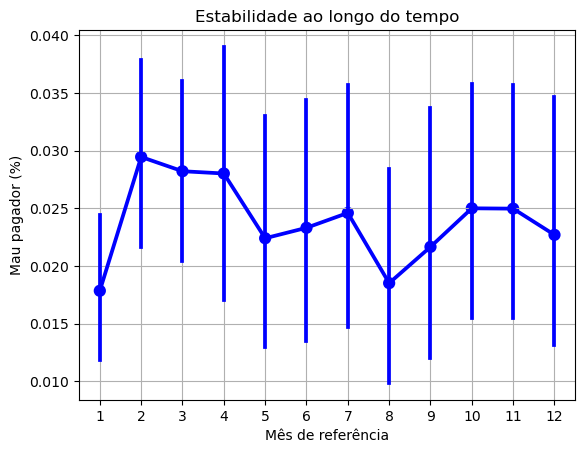

In [31]:
ax = sns.pointplot(x="data_ref_mes", y="mau", label="Estabilidade",
                  data=df_2, dodge=True, ci=95, color="blue", markers="o",
                  linestyle="--", errbars="sd")  

plt.title("Estabilidade ao longo do tempo")  
plt.xlabel("Mês de referência")  
plt.ylabel("Mau pagador (%)")  #
plt.grid(True)  


plt.show()

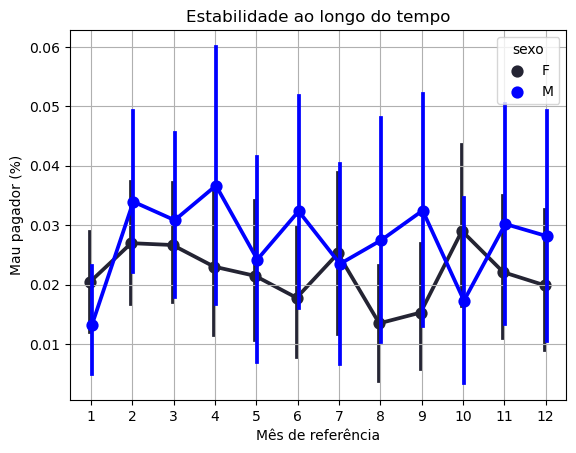

In [32]:
ax = sns.pointplot(x="data_ref_mes", y="mau", label="Estabilidade", hue="sexo",
                  data=df_2, dodge=True, ci=95, color="blue", markers="o",
                  linestyle="--", errbars="sd")  

plt.title("Estabilidade ao longo do tempo")  
plt.xlabel("Mês de referência")  
plt.ylabel("Mau pagador (%)")  #
plt.grid(True)  


plt.show()

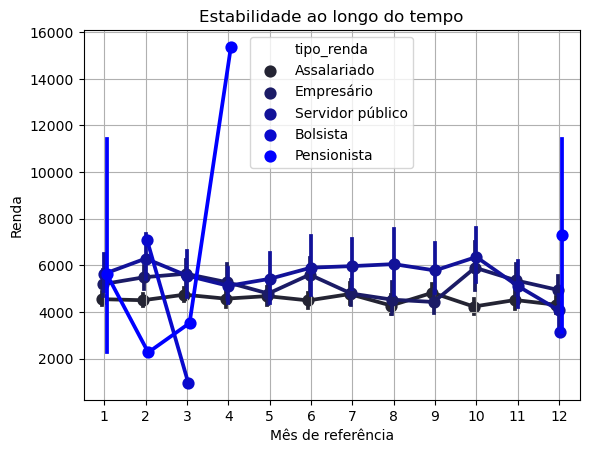

In [48]:
ax = sns.pointplot(x="data_ref_mes", y="renda", label="Estabilidade", hue="tipo_renda",
                  data=df_2, dodge=True, ci=95, color="blue", markers="o",
                  linestyle="--", errbars="sd")  

plt.title("Estabilidade ao longo do tempo")  
plt.xlabel("Mês de referência")  
plt.ylabel("Renda")  #
plt.grid(True)  


plt.show()

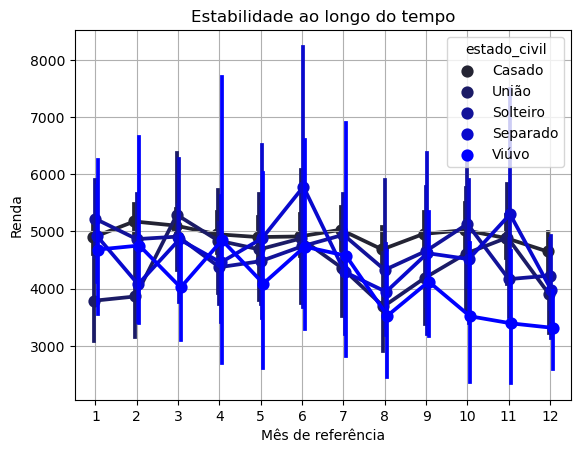

In [49]:
ax = sns.pointplot(x="data_ref_mes", y="renda", label="Estabilidade", hue="estado_civil",
                  data=df_2, dodge=True, ci=95, color="blue", markers="o",
                  linestyle="--", errbars="sd")  

plt.title("Estabilidade ao longo do tempo")  
plt.xlabel("Mês de referência")  
plt.ylabel("Renda")  #
plt.grid(True)  


plt.show()

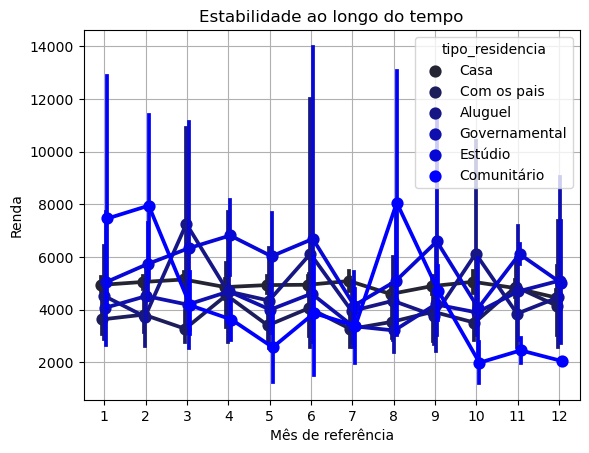

In [50]:
ax = sns.pointplot(x="data_ref_mes", y="renda", label="Estabilidade", hue="tipo_residencia",
                  data=df_2, dodge=True, ci=95, color="blue", markers="o",
                  linestyle="--", errbars="sd")  

plt.title("Estabilidade ao longo do tempo")  
plt.xlabel("Mês de referência")  
plt.ylabel("Renda")  #
plt.grid(True)  


plt.show()

Utilizar os dados de posse de veículo seria arriscado no caso deste modelo, a diferença de março e abril beira os limites do erro, isso é valido também para o caso do tipo de renda e tipo de residencia, onde existe uma variação significativa ao longo do tempo, podendo deixar o modelo frágil. As outras variáveis, mau pagador e posse de imóvel, etc. não tem variação estatística para ser considerado instável ao longo de um ano, o ideal seria ter dados de mais anos para avaliar a sazonalidade dos dados.